## Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_pickle('./finalmodeling_df.pkl')

In [33]:
df = df.reset_index()

The cleaned tokens tally up to 29870979 total words
--------------------
Each feature has on average 124.0 words
--------------------
Each feature has a median of 82.0 words
--------------------
The minimum post is 51 words
--------------------


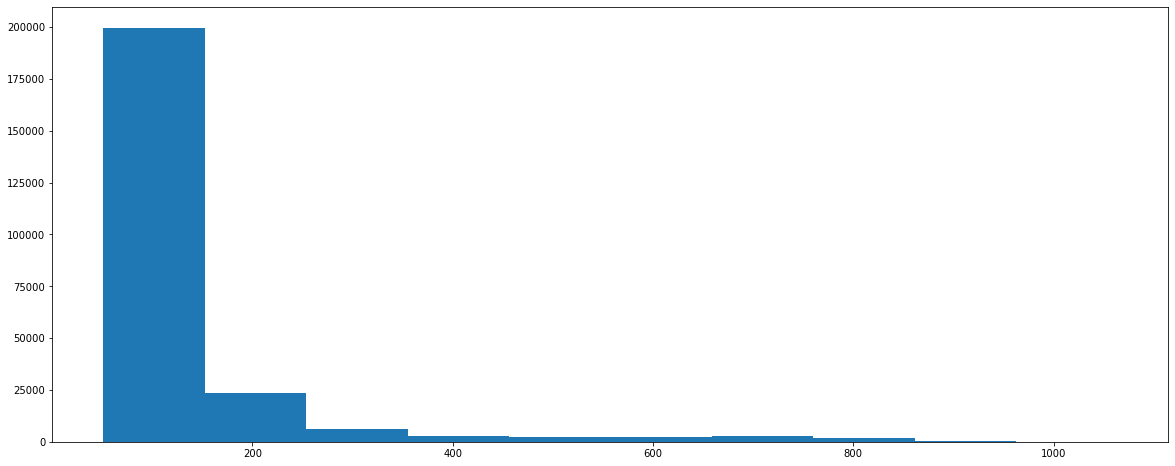

In [17]:
total_words = df['post_token'].apply(lambda x: len(x)).sum()
print(f'The cleaned tokens tally up to {total_words} total words')

print('-'*20)

ave_post = df['post_token'].apply(lambda x: len(x)).mean()
print(f'Each feature has on average {round(ave_post)} words')

print('-'*20)

med_post = df['post_token'].apply(lambda x: len(x)).median()
print(f'Each feature has a median of {round(med_post)} words')

print('-'*20)

min_post = df['post_token'].apply(lambda x: len(x)).min()
print(f'The minimum post is {round(min_post)} words')

print('-'*20)

plt.figure(figsize=(20,8))
plt.hist(df['post_token'].apply(lambda x: len(x)));

In [38]:
# looking at some random posts
for i in np.random.randint(0, len(df), 5):
    print(df['token_joined'].iloc[i])
    print('>'*10 + df['type'].iloc[i] + '<'*10)
    print('-'*25)

## BE CAREFUL... Reddit posts can be quite rude...


yup sound like rant honest first paragraph little hard follow youve got lot run sentence issue girlfriend might enfp know best shes u shes got shit learn organize specific straight forward word waver youve got shit learn listening feeling finding right way express know person understands understand personal priority finding common ground standard stuff people different underlying goal conversation instead infiltrating mind find common ground try explain side even harder make much sense yet personal bias mean every argument mix objective fact subjectively interpreted organized fit completely subjective goal frequently see v thing side conveniently ignore choice data others argument one party meltdown people say crap like person logic theyre stupid theyre emotionally cold insulting stuff either party get closer solution person shut ability listen adult hissy fit mean type frequently like say theyre hissy fit look cleaner still hissy fit dont know mature know going end mature two first li

In [52]:
pd.set_option('display.width', 120)
regxx = '(intp)|(intj)|(entp)|(entj)|(infj)|(infp)|(enfj)|(enfp)|(istj)|(isfj)|(estj)|(esfj)|(istp)|(isfp)|(estp)|(esfp)'
cheat_index = df[df['token_joined'].str.match(regxx)]['token_joined'].index

df.loc[cheat_index, ['type', 'post_token']]

# It would be worth removing and MBTI text from the joined tokens even if it does not match the writers type

,type,post_token
50,enfp,"[intjs, different, intriguing, drawn, girlfrie..."
86,entj,"[entj, thing, happen, back, august, intj, girl..."
94,intp,"[infj, friend, love, around, help, balance, em..."
103,enfp,"[enfp, spent, many, year, popular, flirtatious..."
160,intp,"[intp, look, lot, like, ne, ego, type, infanti..."
...,...,...
241536,infp,"[enfj, close, female, friend, enfj, boyfriend,..."
241554,infp,"[isfp, one, doesnt, doesnt, bother, intp, way,..."
241562,intj,"[enfp, maybe, im, wondering, pewdiepie, used, ..."
241609,intp,"[intp, much, prefer, self, teaching, cant, foc..."


---

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC


from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Baseline Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer()), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB())
              ])

# Baseline Random Forest
rfc = Pipeline([('vect', CountVectorizer()),
               ('clf', RandomForestClassifier(max_depth=1000))
              ])
# Baseline Linear SVC 
lin_svc = Pipeline([('vect', CountVectorizer()),
                    ('clf', LinearSVC())
                ])
# Baseline SVC 
svc_ = Pipeline([('vect', CountVectorizer()),
                    ('clf', SVC())
                ])

''' THE FOLLOWING MODELS ARE THE SAME AS BASELINE BUT WITH BIGRAMS'''

# Baseline Linear Support Vector Machine /w Bigrams
sgd_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes /w Bigrams
naive_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('clf', MultinomialNB())
              ])

# Baseline Random Forest /w Bigrams
rfc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
            ('clf', RandomForestClassifier(max_depth=1000))
              ])
# Baseline Linear SVC w/ Bigrams
lin_svc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                    ('clf', LinearSVC())
                ])
# Baseline SVC w/ Bigrams
svc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                    ('clf', SVC())
                ])


# List of baseline models
baseline_models = [sgd, naive, rfc, lin_svc, svc_, sgd_n2, naive_n2, rfc_n2, lin_svc_n2, svc_n2]

In [ ]:
X = df['token_joined']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [ ]:
for pipe in baseline_models:  
    model_name = str(pipe[1])
    print(f'Working on {model_name} @ {time.asctime()}')
    print('-'*20)

    pipe.fit(X_train, y_train)
    cv_score = cross_val_score(pipe, X_train, y_train, cv=5)
    cv_score_mean = round(np.mean(cv_score), 4)
    
    y_pred = pipe.predict(X_test)
    acc_score = accuracy_score(y_pred, y_test)

    print(f"Model: {model_name} CV: {cv_score_mean} TEST ACC: {acc_score}")

In [ ]:
''' THE FOLLOWING MODELS LIMITING min doc frequency ON THE CountVecorizer'''

# Baseline Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer(min_df=20)), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes
naive = Pipeline([('vect', CountVectorizer(min_df=20)),
               ('clf', MultinomialNB())
              ])

# Baseline Logistic Regression
log_reg = Pipeline([('vect', CountVectorizer(min_df=20)),
                    ('clf', LogisticRegression(max_iter=1000))
              ])
# Baseline Random Forest
rfc = Pipeline([('vect', CountVectorizer(min_df=20)),
               ('clf', RandomForestClassifier())
              ])
# Baseline Linear SVC 
lin_svc = Pipeline([('vect', CountVectorizer(min_df=20)),
                    ('clf', LinearSVC())
                ])
# Baseline SVC 
svc_ = Pipeline([('vect', CountVectorizer(min_df=20)),
                    ('clf', SVC())
                ])

''' THE FOLLOWING MODELS ARE THE SAME AS PRIOR BUT WITH BIGRAMS'''

# Baseline Linear Support Vector Machine /w Bigrams
sgd_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes /w Bigrams
naive_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)),
               ('clf', MultinomialNB())
              ])

# Baseline Logistic Regression /w Bigrams
log_reg_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)),
               ('clf', LogisticRegression(max_iter=1000))
              ])
# Baseline Random Forest /w Bigrams
rfc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)),
               ('clf', RandomForestClassifier())
              ])
# Baseline Linear SVC w/ Bigrams
lin_svc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)),
                    ('clf', LinearSVC())
                ])
# Baseline SVC w/ Bigrams
svc_n2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), min_df=20)),
                    ('clf', SVC())
                ])


# List of baseline models
baseline_models = [sgd, naive, log_reg, rfc, lin_svc, svc_, sgd_n2, naive_n2, log_reg_n2, rfc_n2, lin_svc_n2, svc_n2]

In [ ]:
# Baseline Linear Support Vector Machine
sgd = Pipeline([('vect', TfidfVectorizer()), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes
naive = Pipeline([('vect', TfidfVectorizer()),
               ('clf', MultinomialNB())
              ])

# Baseline Logistic Regression
log_reg = Pipeline([('vect', TfidfVectorizer()),
               ('clf', LogisticRegression())
              ])
# Baseline Random Forest
rfc = Pipeline([('vect', TfidfVectorizer()),
               ('clf', RandomForestClassifier())
              ])
# Baseline Linear SVC 
lin_svc = Pipeline([('vect', TfidfVectorizer()),
                    ('clf', LinearSVC())
                ])
# Baseline SVC 
svc_ = Pipeline([('vect', TfidfVectorizer()),
                    ('clf', SVC())
                ])

''' THE FOLLOWING MODELS ARE THE SAME AS BASELINE BUT WITH BIGRAMS'''

# Baseline Linear Support Vector Machine /w Bigrams
sgd_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))), 
               ('clf', SGDClassifier())
              ])

# Baseline Naive Bayes /w Bigrams
naive_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))),
               ('clf', MultinomialNB())
              ])

# Baseline Logistic Regression /w Bigrams
log_reg_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))),
               ('clf', LogisticRegression())
              ])
# Baseline Random Forest /w Bigrams
rfc_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))),
               ('clf', RandomForestClassifier())
              ])
# Baseline Linear SVC w/ Bigrams
lin_svc_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))),
                    ('clf', LinearSVC())
                ])
# Baseline SVC w/ Bigrams
svc_n2 = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))),
                    ('clf', SVC())
                ])